### MAIN: Get $P_{n+1}$ 

In [24]:
""" Get all extensions from the decorated graph (not a poset) of a function in Pn. These extensions are obtained by taking all combinatios
of vertices, I, and obtaining the vertices reachable from I and including I. """

import numpy as np
import pickle
import networkx as nx
from sage.graphs.graph_input import from_dict_of_lists
import itertools
from collections import OrderedDict

name="for_P3" #! CHANGE ME
path=f"ins/{name}"
pickle_in = open(path, "rb")
p_in = pickle.load(pickle_in)
pickle_in.close()
# funct_graph_lst=p_in[:100] #For P6
funct_graph_lst=p_in

#Pick first graph and get combinations of vertices, so dont need to calc each time.
G=funct_graph_lst[0]
g=nx.DiGraph(G)
verts=g.nodes
combs=[]
for L in range(0, len(verts)+1):
    for subset in itertools.combinations(verts, L):
        combs.append(list(subset))
        print(subset)
vert_len=len(verts)

print("Number of combinations we are checking:",len(combs))#: #for P3,P4,P5: 8,128,32768
    
Up_lst=[]
fail_lst_indexs=[]
for fun_g in [funct_graph_lst[0]]: #For P6 do in parts. #For P6 #CHANGEME
    
#     print(funct_graph_lst.index(fun_g))

    extend_f=[]    
    G=fun_g
    g=nx.DiGraph(G)
    
    for I in combs:#Run through combos of verts.# Takes the most time.
        setv=Set([])
#         print(I)
        for i in I: 
            nodes = list(nx.shortest_path(g,i).keys())
            snodes=Set(nodes)
            setv=setv|snodes
#             print(len(setv))
#             if len(setv)==vert_len:
#                 break
        extend_f.append(sorted(list(setv)))
        
    #Want to kill repeats in this indent: #When i want to remove repeats from a list of lists.
    lst =extend_f
    t_lst=[tuple([tuple(i) for i in x]) for x in lst]
    no_repeats=list(OrderedDict.fromkeys(t_lst))#
    no_reps_lst=[[list(i) for i in x] for x in no_repeats]
    
    Up_lst.append(no_reps_lst) #     Up_lst.append(extend_f)

counter=0
for i in Up_lst: #
    counter+=len(list(i))
print(f"\n The total number of lists of extensions is: {counter}")


()
((1,),)
((2,),)
((1, 2),)
((1,), (2,))
((1,), (1, 2))
((2,), (1, 2))
((1,), (2,), (1, 2))
Number of combinations we are checking: 8

 The total number of lists of extensions is: 5


### Leftovers

{'G', 'B', 'L', 'C'}
['G', 'B', 'L', 'C']


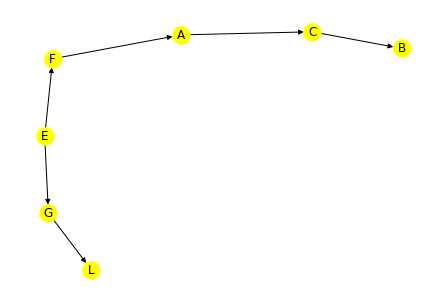

In [27]:
""" For combinations of vertices get reachable vertices.
Source: https://sgyzetrov.github.io/Using_NetworkX_to_find_all_reachable_nodes_in_graph.html
"""

import networkx as nx # version 2.5

# Example
g = nx.DiGraph()
nx.add_path(g, ['A','C','B'])
# nx.add_path(g, ['C','A'])
nx.add_path(g, ['E','F','A'])
nx.add_path(g, ['E','G','L'])
nx.draw(g, with_labels=True, node_color='yellow')

#We have digraph frun fun_g

#Rem to add current vertices to extension.  use +. # Looks like it already adds these verts.

verts=['C','G'] # item from combs

setv=Set([])
# print(setv)
for i in verts:
    nodes = list(nx.shortest_path(g,i).keys())
#     print(i)
#     print(list(nodes))
    snodes=Set(nodes)
    setv=setv|snodes
#     print(snodes)
    
print(setv)

#------------------------
# setv=Set([])
# for i in verts:
#     nodes = list(nx.shortest_path(g,i).keys())
#     snodes=Set(nodes)
#     setv=setv|snodes
    
# extensions.append(list(setv))


In [ ]:
# Leftovers

# What does shortest path do?# Okay i think itll do what i think.
# g = net.DiGraph()
# net.add_path(g, ['A','B','C'])
# net.add_path(g, ['A',"D"])
# net.draw(g, with_labels=True, node_color='yellow')
# nodes = net.shortest_path(g,"A").keys() # Starting node for path. If not specified, compute shortest paths for each possible starting node."""
# print(nodes)

In [20]:
import csv

with open('cvs_P3_nx.csv', 'w') as f: #! CHANGE ME
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerows(Up_lst)


In [ ]:
A = frozenset([1, 2, 3])
B = frozenset([1,3,2])
# A={1,2,3}
# B={1,2,3}
C=set([A,B])
C

In [ ]:
""" For combinations of vertices get reachable vertices.
Source: https://sgyzetrov.github.io/Using_NetworkX_to_find_all_reachable_nodes_in_graph.html
"""

import networkx as net # version 2.5
import matplotlib.pyplot as plt

#----------------------------

# Create a sample graph
# g = net.DiGraph()
# net.add_path(g, ['A','B','C'])
# net.add_path(g, ['A','C','D'])
# net.add_path(g, ['A','E','F'])
# net.draw(g, with_labels=True, node_color='yellow')
# nodes = net.shortest_path(g,'B').keys() # Starting node for path. If not specified, compute shortest paths for each possible starting node."""


#What is there is a loop? # seems to work.
# g = net.DiGraph()
# net.add_path(g, ['A','B','C'])
# net.add_path(g, ['C','A'])
# net.add_path(g, ['A','E','F'])
# net.draw(g, with_labels=True, node_color='yellow')

# verts=['C']

# setv=Set([]).is_empty()
# for i in verts:
#     nodes = list(net.shortest_path(g,i).keys())
# #     print(i)
# #     print(list(nodes))
#     snodes=Set(nodes)
# #     setv.union(snodes)
# #     print(snodes)
    
# print(snodes)



In [ ]:
# Multiple-source reachability:
    
# traversal digraph 

# # https://ask.sagemath.org/question/38452/paths-beginning-with-a-certain-vertex/

# def findAllPaths( G, startVertex, length ):

#     vertices  = G.vertices()
#     edges     = G.edges( labels=False )
#     sim_edges = [ (k,j) for (j,k) in edges if j != k ]
#     edges    += sim_edges

#     edges . sort()

#     paths = [ [ startVertex, ] ]
#     L     = 0

#     while L < length:
#         paths = [ pat + [ vertex, ]
#                   for pat in paths
#                   for vertex in vertices
#                   if ( pat[-1], vertex ) in edges ]
#         L += 1
#     return paths


# G = graphs.OctahedralGraph()
# pathsG7 = findAllPaths( G, 0, 7 )

# for path in pathsG7:
#     print ''.join( [ str(v) for v in path ] )

In [ ]:
# # import networkx as nx

# # Search: digraph subgraph generate on vertices
# # https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html

# # G = nx.path_graph(4)  # or DiGraph, MultiGraph, MultiDiGraph, etc
# # # nx.draw(G)

# # # H = G.subgraph([0, 1, 2])

# # list(H.edges)

# #For non digraphs though.

# # list(G.edges)
# # [(0, 1), (1, 2)]

# #-----------------------

# G = nx.DiGraph()
# G.add_edges_from([(1, 2), (1, 3),(3,4),(4,5)])
# print(list(G.edges()))
# # nx.draw(G)

# H=G.subgraph([3])
# # nx.draw(H)

# list(H.edges())

# # Doesnt get vertices along source vertices.

# #The induced subgraph of the graph contains the nodes in nbunch and the edges between those nodes.

